# K- Nearest Neighbor (KNN)

problem statement :

The data given in the url  is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to predict whether client will subscribe to term deposit
            https://drive.google.com/open?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn


In [1]:
#importing necessary libraries

#importing pandas library to handel dataset
import pandas as pd
#importing numpy library for faster matrix calculations
import numpy as np
#importing matplotlib for plotting data graphs
import matplotlib.pyplot as plt
#importing seaborn advanced plotting library
import seaborn as sns

#loading data set
bank_data = pd.read_csv("bank.csv", sep=';')
#seeing data set
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### data preprocessing 

In [2]:
#checking data description like mean , minimum value , maximum value........
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [3]:
#checking for null values in data set
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
#getting all the column names
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
#checking for columns having continous and discrete(non-numerical) data
bank_data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [6]:
# changing all catagorical data into numerical data

#these are the column having catagorical data
catagorical_columns =['job','marital','education','default','housing','loan','contact','month','poutcome','y']

#looping through all columns
for column in catagorical_columns:
    value =1
    # sorting ccatories of the column
    categories = sorted(bank_data[column].unique())
    for category in categories:
        bank_data.loc[bank_data[column] == category, column] = value
        value += 1

In [7]:
#printing data set after changing values
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,11,2,1,1,1787,1,1,1,19,11,79,1,-1,0,4,1
1,33,8,2,2,1,4789,2,2,1,11,9,220,1,339,4,1,1
2,35,5,3,3,1,1350,2,1,1,16,1,185,1,330,1,1,1
3,30,5,2,3,1,1476,2,2,3,3,7,199,4,-1,0,4,1
4,59,2,2,2,1,0,2,1,3,5,9,226,1,-1,0,4,1


In [8]:
#again peeking at description on data set
bank_data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,5.411192,2.147755,2.231365,1.016810,1422.657819,1.566025,1.152842,1.652289,15.915284,6.540146,263.961292,2.793630,39.766645,0.542579,3.559168,1.115240
std,10.576211,3.255716,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,3.002763,259.856633,3.109807,100.121124,1.693562,0.992051,0.319347
min,19.000000,1.000000,1.000000,1.000000,1.000000,-3313.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,1.000000,1.000000
25%,33.000000,2.000000,2.000000,2.000000,1.000000,69.000000,1.000000,1.000000,1.000000,9.000000,4.000000,104.000000,1.000000,-1.000000,0.000000,4.000000,1.000000
50%,39.000000,5.000000,2.000000,2.000000,1.000000,444.000000,2.000000,1.000000,1.000000,16.000000,7.000000,185.000000,2.000000,-1.000000,0.000000,4.000000,1.000000
75%,49.000000,8.000000,3.000000,3.000000,1.000000,1480.000000,2.000000,1.000000,3.000000,21.000000,9.000000,329.000000,3.000000,-1.000000,0.000000,4.000000,1.000000
max,87.000000,12.000000,3.000000,4.000000,2.000000,71188.000000,2.000000,2.000000,3.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,4.000000,2.000000


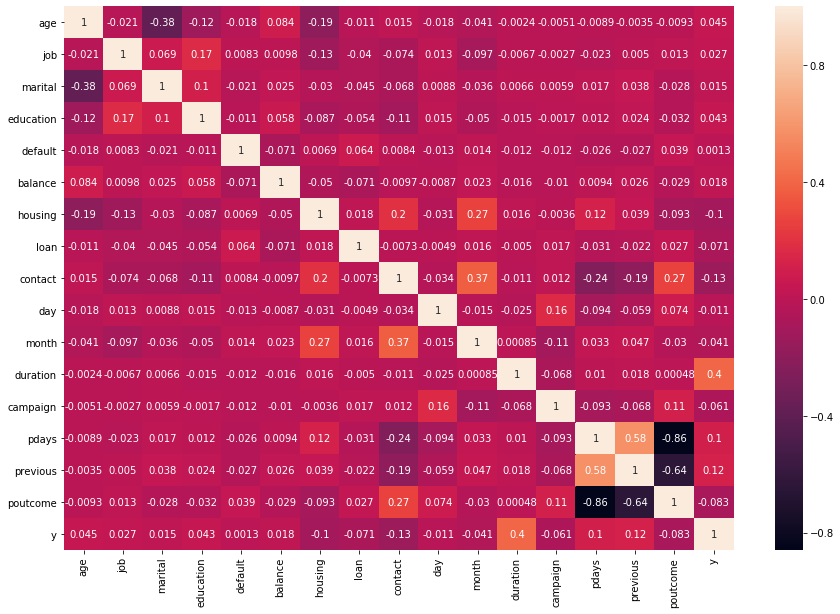

In [9]:
#plotting heatmap from given data set for better view
plt.figure(figsize=(15,10))
sns.heatmap(bank_data.corr(),annot=True)

### seperating train and test data set

In [10]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set

# selecting random 0.7 fraction of dataset as train set
train = bank_data.sample(frac=0.7, random_state=3)   

# chossing different random state will give different random rows
# selecting remaining i.e. 30% as test set
test = bank_data.drop(train.index)  

#printing train data set shape and it's head values
print("shape of train data : ",train.shape)
train.head()

shape of train data :  (3165, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3542,36,8,2,2,1,1746,2,1,3,26,9,99,1,-1,0,4,1
2687,45,10,2,2,1,1673,1,1,1,23,11,76,1,-1,0,4,1
2053,24,10,3,2,1,-46,2,1,3,19,9,23,1,-1,0,4,1
3966,41,10,1,2,1,52,1,1,1,20,2,261,2,-1,0,4,1
1602,47,1,1,2,1,162,2,1,3,9,9,203,4,-1,0,4,1


In [11]:
#printing test data set shape and it's head values
print("shape of test data : ",test.shape)
test.head()

shape of test data :  (1356, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,8,2,2,1,4789,2,2,1,11,9,220,1,339,4,1,1
7,39,10,2,2,1,147,2,1,1,6,9,151,2,-1,0,4,1
8,41,3,2,3,1,221,2,1,3,14,9,57,2,-1,0,4,1
13,20,9,3,2,1,502,1,1,1,30,1,261,1,-1,0,4,2
14,31,2,2,2,1,360,2,2,1,29,5,89,1,241,1,1,1


In [12]:
#defining a method to seperate xtrain,xtest,ytrain,ytest data since there are large number of columns
def split_train_test_x_y(data):   
    #seperating x values
    y_values = np.array(data['y'])
    #seperating y values
    x_values = np.ones((1,len(data)))
    
    for col in data.columns:
        if col != 'y':
            new_row = np.array(data[col]).reshape(1,len(data))
            x_values = np.append(x_values, new_row, axis=0)

    return x_values, y_values

#obtaining x-train,x-test,y-train,y-test values by calling above function
train_x_values, train_y_values = split_train_test_x_y(train)
test_x_values, test_y_values = split_train_test_x_y(test)

In [40]:
test_x_values.shape

(17, 1356)

### making KNN model 

In [34]:
#for KNN model we'll take euclidean distance calculation technique for the distance evaluation
#defining method to calculate distance for given row 
def find_distance(row,data_set):
    temp_value=data_set[:,None]-row
    squared_value = temp_value**2
    return (squared_value).sum().sqrt() 
    

In [35]:
def all_ecu_distance(train_data_set,test_data_set):
    distance_data_frame=pd.DataFrame(columns=['distance','target'])
    for row in range(len(test_data_set)):
        distance_data_frame['distance','target']=find_distance(train_data_set,test_data_set[row]),test_y_values[row]
        return distance_data_frame
    
    

In [41]:
# abc = all_ecu_distance(train_x_values,test_x_values)